v10
10


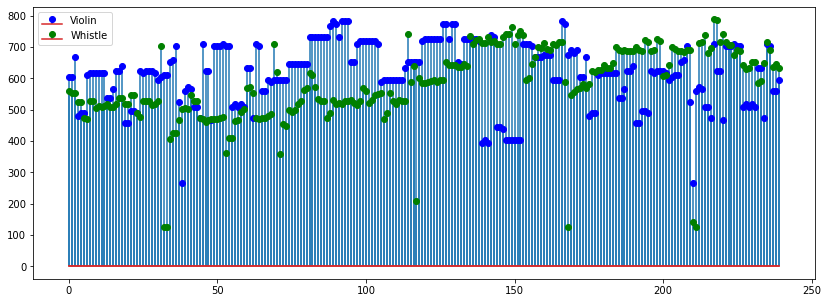

In [80]:
#process 

# 1 patak 
# 2 7th sym
# 3 bosno moja
# 4 uskudara
# 5 ode to joy
# 6 mad world
# 7 soto 
# 8 cvjetak 
# 9 lane moje
#10 rastanak

import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import os

curDoc = os.listdir()
wnames = [ele for ele in curDoc if ele.endswith(".npy")]

freqs = []
powers= []
times = []
names = []

for name in wnames:
    L = 305 - len(np.load(name)[1])
    a = np.concatenate((np.load(name)[1],np.load(name)[1],np.load(name)[1]))
    freqs.append(a[:240])
    
    b = np.concatenate((np.load(name)[2],np.array([0,]*L)))
    powers.append(b)
    
    c = np.concatenate((np.load(name)[0],np.array([0,]*L)))
    times.append(c)
    
    names.append(name[:-5])
    
freqs = np.array(freqs)
powers= np.array(powers)
times = np.array(times)
#%%
ratios = []
for vv in range(10):
    v11 = freqs[30+vv]
    #print(names[30+vv])
    
    kk=3*vv+1
    z11 = freqs[kk]
    #print(names[kk])
    rat = np.mean(z11/v11)
    ratios.append(rat)
    
#%%
vv = 0
v11 = freqs[30+vv]
print(names[30+vv])


kk=3*vv+0
z11 = freqs[kk]/ratios[vv]
print(names[kk])

plt.figure(figsize=(14,5))
plt.stem(v11, markerfmt='bo', label='Violin',use_line_collection=True)
plt.stem(z11, markerfmt='go', label='Whistle',use_line_collection=True)
plt.legend()

In [89]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

def sq_err(A, B):
    return np.square(np.subtract(A, B)).mean()

def get_shift_similarity(a,b):
    sims = []
    for slider in range(1,30):
        SD = sq_err(a[slider:],b[:-slider])
        sims.append(SD)

    return np.argmin(sims),np.min(sims)

## input test 
testnum = 4
for testnum in range(10):
    violin = freqs[30+testnum]
    violin[violin<350] = violin.mean()
    violin[violin>1000] = violin.mean()

    MSE = []
    temp = []
    for N in range(30):
        whisle = freqs[N]/ratios[testnum]
        whisle[whisle<350] = whisle.mean()
        whisle[whisle>800] = whisle.mean()
        S = get_shift_similarity(violin,whisle)
        temp.append(S[1])
        if N%3==2 and N>1:
            MSE.append(np.mean(temp))
            temp=[]

    print(names[30+testnum],np.argmin(MSE))

v10 7
v1 1
v2 1
v3 1
v4 7
v5 5
v6 6
v7 7
v8 7
v9 4
